# Final Project Exploratory Data Analysis

#### Import pandas, matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.rcParams['figure.figsize'] = (9, 8)
# plt.rcParams['font.size'] = 12

In [3]:
ls data

NYPD_Complaint_Data_2018.csv


Original source file here https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i  I dropped several columns and only filtered down to records from 2018, in the interest of conserving CSV filesize.

#### Read in CSV file

In [4]:
nypd = pd.read_csv('data/NYPD_Complaint_Data_2018.csv')

Reference data dictionary [here](https://git.generalassemb.ly/gracepaet/nypd-complaints)

*Change this to a relative reference to a repo file or consider having the data dictionary expand out*

Display all columns

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [6]:
nypd.shape

(466295, 15)

In [7]:
nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_YEAR
0,774621657,2018-10-08,12:30:00,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018
1,232548146,2018-08-24,11:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018
2,452701517,2018-03-30,16:55:00,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018
3,620357753,2018-10-02,16:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018
4,110535568,2018-08-14,14:20:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018


In [8]:
nypd.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'CMPLNT_FR_DT_YEAR'],
      dtype='object')

In [9]:
nypd.dtypes

CMPLNT_NUM            int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
OFNS_DESC            object
LAW_CAT_CD           object
BORO_NM              object
PREM_TYP_DESC        object
JURIS_DESC           object
SUSP_AGE_GROUP       object
SUSP_RACE            object
SUSP_SEX             object
VIC_AGE_GROUP        object
VIC_RACE             object
VIC_SEX              object
CMPLNT_FR_DT_YEAR     int64
dtype: object

#### Confirm all records are from 2018

In [10]:
nypd.CMPLNT_FR_DT_YEAR.value_counts(dropna=False)

2018    466295
Name: CMPLNT_FR_DT_YEAR, dtype: int64

# Exploring the dataframe

In [11]:
nypd.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'LAW_CAT_CD',
       'BORO_NM', 'PREM_TYP_DESC', 'JURIS_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'CMPLNT_FR_DT_YEAR'],
      dtype='object')

In [12]:
nypd.dtypes

CMPLNT_NUM            int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
OFNS_DESC            object
LAW_CAT_CD           object
BORO_NM              object
PREM_TYP_DESC        object
JURIS_DESC           object
SUSP_AGE_GROUP       object
SUSP_RACE            object
SUSP_SEX             object
VIC_AGE_GROUP        object
VIC_RACE             object
VIC_SEX              object
CMPLNT_FR_DT_YEAR     int64
dtype: object

In [13]:
nypd.describe

<bound method NDFrame.describe of         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM                        OFNS_DESC  \
0        774621657   2018-10-08     12:30:00                          ROBBERY   
1        232548146   2018-08-24     11:00:00                    PETIT LARCENY   
2        452701517   2018-03-30     16:55:00                DANGEROUS WEAPONS   
3        620357753   2018-10-02     16:00:00                    PETIT LARCENY   
4        110535568   2018-08-14     14:20:00  MURDER & NON-NEGL. MANSLAUGHTER   
...            ...          ...          ...                              ...   
466290   341791124   2018-12-11     20:00:00                    PETIT LARCENY   
466291   791474790   2018-11-06     00:00:00                           FRAUDS   
466292   584053940   2018-12-31     18:00:00   CRIMINAL MISCHIEF & RELATED OF   
466293   495559106   2018-12-31     13:20:00          MISCELLANEOUS PENAL LAW   
466294   782076755   2018-12-22     16:06:00                    HARRASSMENT

In [14]:
nypd.OFNS_DESC.value_counts(dropna=False)

PETIT LARCENY                     87063
HARRASSMENT 2                     70627
ASSAULT 3 & RELATED OFFENSES      53323
CRIMINAL MISCHIEF & RELATED OF    47627
GRAND LARCENY                     44214
                                  ...  
NEW YORK CITY HEALTH CODE             3
UNLAWFUL POSS. WEAP. ON SCHOOL        2
HOMICIDE-NEGLIGENT-VEHICLE            1
DISRUPTION OF A RELIGIOUS SERV        1
ABORTION                              1
Name: OFNS_DESC, Length: 61, dtype: int64

In [15]:
nypd.LAW_CAT_CD.value_counts(dropna=False)

MISDEMEANOR    252735
FELONY         142209
VIOLATION       71351
Name: LAW_CAT_CD, dtype: int64

In [16]:
nypd.JURIS_DESC.value_counts(dropna=False)

N.Y. POLICE DEPT                413192
N.Y. HOUSING POLICE              33506
N.Y. TRANSIT POLICE              12343
OTHER                             3122
PORT AUTHORITY                    2014
DEPT OF CORRECTIONS                943
TRI-BORO BRDG TUNNL                275
NYC PARKS                          266
HEALTH & HOSP CORP                 239
N.Y. STATE POLICE                  163
METRO NORTH                         79
N.Y. STATE PARKS                    41
NEW YORK CITY SHERIFF OFFICE        33
LONG ISLAND RAILRD                  29
STATN IS RAPID TRANS                17
U.S. PARK POLICE                    14
AMTRACK                             10
NYS DEPT TAX AND FINANCE             8
CONRAIL                              1
Name: JURIS_DESC, dtype: int64

In [17]:
nypd.BORO_NM.value_counts(dropna=False)

BROOKLYN         137426
MANHATTAN        115195
BRONX            101316
QUEENS            91055
STATEN ISLAND     20991
NaN                 312
Name: BORO_NM, dtype: int64

In [18]:
nypd.PREM_TYP_DESC.value_counts(dropna=False)

STREET                        127944
RESIDENCE - APT. HOUSE        104889
RESIDENCE-HOUSE                43991
RESIDENCE - PUBLIC HOUSING     33525
CHAIN STORE                    15168
                               ...  
PHOTO/COPY                        44
CEMETERY                          41
LOAN COMPANY                      21
TRAMWAY                           10
HOMELESS SHELTER                   6
Name: PREM_TYP_DESC, Length: 74, dtype: int64

In [19]:
nypd.SUSP_SEX.value_counts(dropna=False)

M      212025
NaN    119399
U       69030
F       65841
Name: SUSP_SEX, dtype: int64

In [20]:
nypd.VIC_SEX.value_counts(dropna=False)

F    185201
M    160039
D     65773
E     55281
U         1
Name: VIC_SEX, dtype: int64

In [21]:
nypd.SUSP_AGE_GROUP.value_counts(dropna=False)

UNKNOWN    126810
NaN        119399
25-44      117279
45-64       44451
18-24       41938
<18         12437
65+          3948
2018           10
1018            3
928             2
938             1
924             1
-974            1
-2              1
920             1
-939            1
922             1
-63             1
952             1
948             1
955             1
1012            1
-978            1
954             1
-941            1
-80             1
1017            1
1967            1
Name: SUSP_AGE_GROUP, dtype: int64

In [22]:
nypd.VIC_AGE_GROUP.value_counts(dropna=False)

25-44      161564
UNKNOWN    132730
45-64       87168
18-24       45048
65+         20130
<18         19617
-1              2
-974            2
-956            2
951             1
922             1
-940            1
-55             1
-51             1
-970            1
-962            1
936             1
-2              1
-958            1
-43             1
-59             1
-955            1
-972            1
954             1
965             1
-3              1
-968            1
970             1
-61             1
-5              1
1017            1
-4              1
948             1
957             1
-76             1
-952            1
953             1
-966            1
-67             1
929             1
-948            1
Name: VIC_AGE_GROUP, dtype: int64

#### Checking for null values

In [23]:
print(nypd.shape)
nypd.isnull().sum()

(466295, 15)


CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
OFNS_DESC                14
LAW_CAT_CD                0
BORO_NM                 312
PREM_TYP_DESC          1992
JURIS_DESC                0
SUSP_AGE_GROUP       119399
SUSP_RACE            119399
SUSP_SEX             119399
VIC_AGE_GROUP             0
VIC_RACE                  0
VIC_SEX                   0
CMPLNT_FR_DT_YEAR         0
dtype: int64

Will need to handle nulls in these fiels
* `OFNS_DESC`
* `BORO_NM`
* `PREM_TYP_DESC`
* `SUSP_AGE_GROUP`
* `SUSP_RACE`
* `SUSP_SEX`

25% of `SUSP_AGE_GROUP`, `SUSP_RACE`, and `SUSP_SEX` contain nulls!

#### Quick look at the dataframe to see what other cleaning I may have to do

In [24]:
nypd.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_YEAR
0,774621657,2018-10-08,12:30:00,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018
1,232548146,2018-08-24,11:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018
2,452701517,2018-03-30,16:55:00,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018
3,620357753,2018-10-02,16:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018
4,110535568,2018-08-14,14:20:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018


In [25]:
# pd.DataFrame(nypd.SUSP_RACE.value_counts())
nypd.SUSP_RACE.value_counts().sort_index() # Sort by susp_race

AMERICAN INDIAN/ALASKAN NATIVE      1170
ASIAN / PACIFIC ISLANDER           13132
BLACK                             131560
BLACK HISPANIC                     19375
UNKNOWN                            83750
WHITE                              35922
WHITE HISPANIC                     61987
Name: SUSP_RACE, dtype: int64

# Cleaning the data

In [26]:
nypd.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_YEAR
0,774621657,2018-10-08,12:30:00,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018
1,232548146,2018-08-24,11:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018
2,452701517,2018-03-30,16:55:00,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018
3,620357753,2018-10-02,16:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018
4,110535568,2018-08-14,14:20:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018


In [27]:
print(nypd.shape)
nypd.isnull().sum()

(466295, 15)


CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
OFNS_DESC                14
LAW_CAT_CD                0
BORO_NM                 312
PREM_TYP_DESC          1992
JURIS_DESC                0
SUSP_AGE_GROUP       119399
SUSP_RACE            119399
SUSP_SEX             119399
VIC_AGE_GROUP             0
VIC_RACE                  0
VIC_SEX                   0
CMPLNT_FR_DT_YEAR         0
dtype: int64

**Create new column with date and time strings combined**

In [28]:
nypd['CMPLNT_FR'] = nypd['CMPLNT_FR'] = nypd['CMPLNT_FR_DT'] + ' ' + nypd['CMPLNT_FR_TM']

In [29]:
nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_YEAR,CMPLNT_FR
0,774621657,2018-10-08,12:30:00,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018,2018-10-08 12:30:00
1,232548146,2018-08-24,11:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018,2018-08-24 11:00:00
2,452701517,2018-03-30,16:55:00,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018,2018-03-30 16:55:00
3,620357753,2018-10-02,16:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018,2018-10-02 16:00:00
4,110535568,2018-08-14,14:20:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018,2018-08-14 14:20:00


In [30]:
nypd['CMPLNT_FR'] = pd.to_datetime(nypd['CMPLNT_FR'])

In [31]:
nypd.dtypes

CMPLNT_NUM                    int64
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
OFNS_DESC                    object
LAW_CAT_CD                   object
BORO_NM                      object
PREM_TYP_DESC                object
JURIS_DESC                   object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
VIC_AGE_GROUP                object
VIC_RACE                     object
VIC_SEX                      object
CMPLNT_FR_DT_YEAR             int64
CMPLNT_FR            datetime64[ns]
dtype: object

**Create month, day of week, date, hour columns**

In [32]:
nypd['CMPLNT_FR_MONTH'] = nypd['CMPLNT_FR'].dt.month

In [33]:
nypd['CMPLNT_FR_DAY_OF_WEEK'] = nypd['CMPLNT_FR'].dt.dayofweek

In [34]:
nypd['CMPLNT_FR_HOUR'] = nypd['CMPLNT_FR'].dt.hour

In [35]:
nypd['CMPLNT_FR_DATE'] = nypd['CMPLNT_FR'].dt.date

In [36]:
nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_YEAR,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,2018-10-08,12:30:00,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,2018-08-24,11:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,2018-03-30,16:55:00,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,2018-10-02,16:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018,2018-10-02 16:00:00,10,1,16,2018-10-02
4,110535568,2018-08-14,14:20:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018,2018-08-14 14:20:00,8,1,14,2018-08-14


### Now that we created all the datetime columns we needed, we can drop the `CMPLNT_FR_DT` and `CMPLNT_FR_TM` columns. We can also drop `CMPLNT_FR_DT_YEAR` from the dataframe since we confirmed all records are from 2018

In [37]:
nypd.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DT_YEAR,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,2018-10-08,12:30:00,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,2018-08-24,11:00:00,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,2018-03-30,16:55:00,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,2018-10-02,16:00:00,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018,2018-10-02 16:00:00,10,1,16,2018-10-02
4,110535568,2018-08-14,14:20:00,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018,2018-08-14 14:20:00,8,1,14,2018-08-14


In [38]:
columns_to_delete = ['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_FR_DT_YEAR']

In [39]:
nypd.drop(columns_to_delete, inplace=True, axis=1)

In [40]:
nypd

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,NaN,NaN,NaN,45-64,WHITE,F,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018-10-02 16:00:00,10,1,16,2018-10-02
4,110535568,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-08-14 14:20:00,8,1,14,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466290,341791124,PETIT LARCENY,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,<18,BLACK HISPANIC,M,25-44,BLACK HISPANIC,F,2018-12-11 20:00:00,12,1,20,2018-12-11
466291,791474790,FRAUDS,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. POLICE DEPT,NaN,NaN,NaN,65+,BLACK,M,2018-11-06 00:00:00,11,1,0,2018-11-06
466292,584053940,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,NaN,NaN,NaN,45-64,BLACK HISPANIC,F,2018-12-31 18:00:00,12,0,18,2018-12-31
466293,495559106,MISCELLANEOUS PENAL LAW,FELONY,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,25-44,BLACK,F,25-44,BLACK HISPANIC,F,2018-12-31 13:20:00,12,0,13,2018-12-31


In [41]:
print(nypd.shape)
nypd.isnull().sum()

(466295, 17)


CMPLNT_NUM                    0
OFNS_DESC                    14
LAW_CAT_CD                    0
BORO_NM                     312
PREM_TYP_DESC              1992
JURIS_DESC                    0
SUSP_AGE_GROUP           119399
SUSP_RACE                119399
SUSP_SEX                 119399
VIC_AGE_GROUP                 0
VIC_RACE                      0
VIC_SEX                       0
CMPLNT_FR                     0
CMPLNT_FR_MONTH               0
CMPLNT_FR_DAY_OF_WEEK         0
CMPLNT_FR_HOUR                0
CMPLNT_FR_DATE                0
dtype: int64

**Show all rows where `OFNS_DESC` is null**

In [42]:
nypd[nypd['OFNS_DESC'].isnull()]

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
1289,123155015,NaN,FELONY,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,25-44,BLACK,M,25-44,BLACK,M,2018-02-01 22:45:00,2,3,22,2018-02-01
123137,281923211,NaN,FELONY,BRONX,COMMERCIAL BUILDING,N.Y. POLICE DEPT,45-64,BLACK HISPANIC,M,<18,WHITE HISPANIC,F,2018-06-13 17:00:00,6,2,17,2018-06-13
333765,802300948,NaN,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,WHITE,M,UNKNOWN,UNKNOWN,E,2018-08-20 08:00:00,8,0,8,2018-08-20
339070,826244669,NaN,FELONY,BROOKLYN,PUBLIC SCHOOL,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,M,UNKNOWN,UNKNOWN,E,2018-02-13 07:30:00,2,1,7,2018-02-13
348494,996957479,NaN,FELONY,STATEN ISLAND,RESIDENCE-HOUSE,N.Y. POLICE DEPT,<18,WHITE,M,UNKNOWN,UNKNOWN,E,2018-04-08 13:00:00,4,6,13,2018-04-08
351092,641518495,NaN,FELONY,MANHATTAN,BUS TERMINAL,PORT AUTHORITY,25-44,BLACK,M,UNKNOWN,UNKNOWN,E,2018-08-13 10:07:00,8,0,10,2018-08-13
453041,803987554,NaN,FELONY,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,25-44,BLACK,M,UNKNOWN,UNKNOWN,E,2018-09-25 09:00:00,9,1,9,2018-09-25
453393,288975395,NaN,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,65+,WHITE,M,UNKNOWN,UNKNOWN,E,2018-10-16 02:37:00,10,1,2,2018-10-16
455258,313776880,NaN,FELONY,MANHATTAN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,<18,WHITE HISPANIC,F,2018-12-01 00:01:00,12,5,0,2018-12-01
455379,188714222,NaN,FELONY,MANHATTAN,PRIVATE/PAROCHIAL SCHOOL,N.Y. POLICE DEPT,25-44,BLACK,M,<18,WHITE HISPANIC,F,2018-12-01 00:01:00,12,5,0,2018-12-01


14 records where `OFNS_DESC` is null

In [43]:
nypd.shape

(466295, 17)

**Drop rows where `OFNS_DESC` is null**

In [44]:
nypd_ofns_nulls_dropped = nypd.dropna(subset=['OFNS_DESC'], inplace=True)

In [45]:
nypd.shape

(466281, 17)

In [46]:
print(nypd.shape)
nypd.isnull().sum()

(466281, 17)


CMPLNT_NUM                    0
OFNS_DESC                     0
LAW_CAT_CD                    0
BORO_NM                     312
PREM_TYP_DESC              1990
JURIS_DESC                    0
SUSP_AGE_GROUP           119399
SUSP_RACE                119399
SUSP_SEX                 119399
VIC_AGE_GROUP                 0
VIC_RACE                      0
VIC_SEX                       0
CMPLNT_FR                     0
CMPLNT_FR_MONTH               0
CMPLNT_FR_DAY_OF_WEEK         0
CMPLNT_FR_HOUR                0
CMPLNT_FR_DATE                0
dtype: int64

In [47]:
nypd[nypd['BORO_NM'].isnull()].head(10)

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
4,110535568,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-08-14 14:20:00,8,1,14,2018-08-14
14,151092061,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,NaN,NaN,NaN,25-44,BLACK,M,2018-09-26 20:15:00,9,2,20,2018-09-26
39,537944545,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,18-24,WHITE HISPANIC,M,18-24,WHITE HISPANIC,M,2018-02-02 18:30:00,2,4,18,2018-02-02
41,849357488,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. HOUSING POLICE,45-64,BLACK,M,25-44,BLACK,M,2018-05-16 03:00:00,5,2,3,2018-05-16
74,614396339,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,18-24,BLACK,M,2018-03-03 18:10:00,3,5,18,2018-03-03
92,514585000,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,WHITE,M,25-44,WHITE,F,2018-07-30 20:53:00,7,0,20,2018-07-30
105,971606705,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,<18,BLACK,M,<18,BLACK,M,2018-07-11 13:50:00,7,2,13,2018-07-11
138,900687456,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-09-28 17:55:00,9,4,17,2018-09-28
195,327270181,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. HOUSING POLICE,NaN,NaN,NaN,45-64,BLACK,M,2018-05-13 16:50:00,5,6,16,2018-05-13
212,198301916,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,NaN,NaN,N.Y. POLICE DEPT,18-24,BLACK,M,25-44,BLACK,F,2018-01-15 23:39:00,1,0,23,2018-01-15


#### Wow, huge number of the rows where `BORO_NM` is null are MURDER & NON NEGL. MANSLAUGHTER offenses. Is the boro not being reported because they're trying to hide murder rates? Possibly dig into this later if I have time

In [48]:
nypd.BORO_NM.value_counts(dropna=False)

BROOKLYN         137422
MANHATTAN        115188
BRONX            101314
QUEENS            91055
STATEN ISLAND     20990
NaN                 312
Name: BORO_NM, dtype: int64

**Change all nulls in BORO_NM to UNKNOWN**

In [49]:
nypd.fillna(value={'BORO_NM': 'UNKNOWN'}, inplace=True)

In [50]:
nypd.BORO_NM.value_counts(dropna=False)

BROOKLYN         137422
MANHATTAN        115188
BRONX            101314
QUEENS            91055
STATEN ISLAND     20990
UNKNOWN             312
Name: BORO_NM, dtype: int64

**Examine `SUSP_AGE_GROUP`, `VIC_AGE_GROUP`, `SUSP_RACE`, `VIC_RACE`, `SUSP_SEX`, `VIC_SEX` for the values we see there. Need to determine what we'll do with the nulls and for the values that don't make sense**

In [51]:
nypd.SUSP_AGE_GROUP.value_counts(dropna=False)

UNKNOWN    126809
NaN        119399
25-44      117270
45-64       44450
18-24       41938
<18         12436
65+          3946
2018           10
1018            3
928             2
938             1
924             1
-974            1
-2              1
920             1
-939            1
922             1
-63             1
952             1
948             1
955             1
1012            1
-978            1
954             1
-941            1
-80             1
1017            1
1967            1
Name: SUSP_AGE_GROUP, dtype: int64

In [52]:
nypd.VIC_AGE_GROUP.value_counts(dropna=False)

25-44      161563
UNKNOWN    132722
45-64       87168
18-24       45048
65+         20130
<18         19612
-1              2
-974            2
-956            2
951             1
922             1
-940            1
-55             1
-51             1
-970            1
-962            1
936             1
-2              1
-958            1
-43             1
-59             1
-955            1
-972            1
954             1
965             1
-3              1
-968            1
970             1
-61             1
-5              1
1017            1
-4              1
948             1
957             1
-76             1
-952            1
953             1
-966            1
-67             1
929             1
-948            1
Name: VIC_AGE_GROUP, dtype: int64

In [53]:
nypd.SUSP_RACE.value_counts(dropna=False)

BLACK                             131552
NaN                               119399
UNKNOWN                            83749
WHITE HISPANIC                     61987
WHITE                              35918
BLACK HISPANIC                     19374
ASIAN / PACIFIC ISLANDER           13132
AMERICAN INDIAN/ALASKAN NATIVE      1170
Name: SUSP_RACE, dtype: int64

In [54]:
nypd.VIC_RACE.value_counts(dropna=False)

UNKNOWN                           141643
BLACK                             116690
WHITE HISPANIC                     79718
WHITE                              74929
ASIAN / PACIFIC ISLANDER           32707
BLACK HISPANIC                     17990
AMERICAN INDIAN/ALASKAN NATIVE      2604
Name: VIC_RACE, dtype: int64

In [55]:
nypd.SUSP_SEX.value_counts(dropna=False)

M      212011
NaN    119399
U       69030
F       65841
Name: SUSP_SEX, dtype: int64

In [56]:
nypd.VIC_SEX.value_counts(dropna=False)

F    185196
M    160038
D     65773
E     55273
U         1
Name: VIC_SEX, dtype: int64

**E and D explained here https://jmc2392.github.io/exploratory2.html**

#### Let's start handling more nulls
* Any nulls in the `SUSP_AGE_GROUP` we'll change to UNKNOWN
* Any nulls in the `SUSP_RACE` we'll change to UNKNOWN

In [57]:
nypd.fillna(value={'SUSP_AGE_GROUP': 'UNKNOWN', 'SUSP_RACE': 'UNKNOWN'}, inplace=True)

**Checking count of nulls here now**

In [58]:
nypd.SUSP_AGE_GROUP.value_counts(dropna=False)

UNKNOWN    246208
25-44      117270
45-64       44450
18-24       41938
<18         12436
65+          3946
2018           10
1018            3
928             2
955             1
948             1
1017            1
938             1
924             1
-974            1
-2              1
920             1
-80             1
-941            1
954             1
-978            1
922             1
1967            1
-63             1
952             1
1012            1
-939            1
Name: SUSP_AGE_GROUP, dtype: int64

In [59]:
nypd.SUSP_RACE.value_counts(dropna=False)

UNKNOWN                           203148
BLACK                             131552
WHITE HISPANIC                     61987
WHITE                              35918
BLACK HISPANIC                     19374
ASIAN / PACIFIC ISLANDER           13132
AMERICAN INDIAN/ALASKAN NATIVE      1170
Name: SUSP_RACE, dtype: int64

Looks good!

#### We'll now change the nulls in `SUSP_SEX` to U

In [60]:
nypd.fillna(value={'SUSP_SEX': 'U'}, inplace=True)

**Let's check the count of nulls in `SUSP_SEX` now**

In [61]:
nypd.SUSP_SEX.value_counts(dropna=False)

M    212011
U    188429
F     65841
Name: SUSP_SEX, dtype: int64

**The only valid age groups should be UNKNOWN, less than 18, 18-24, 25-44, 45-64 and 65+. Let's change the other values to UNKNOWN**

In [62]:
nypd.SUSP_AGE_GROUP.value_counts(dropna=False)

UNKNOWN    246208
25-44      117270
45-64       44450
18-24       41938
<18         12436
65+          3946
2018           10
1018            3
928             2
955             1
948             1
1017            1
938             1
924             1
-974            1
-2              1
920             1
-80             1
-941            1
954             1
-978            1
922             1
1967            1
-63             1
952             1
1012            1
-939            1
Name: SUSP_AGE_GROUP, dtype: int64

In [63]:
nypd.VIC_AGE_GROUP.value_counts(dropna=False)

25-44      161563
UNKNOWN    132722
45-64       87168
18-24       45048
65+         20130
<18         19612
-1              2
-974            2
-956            2
951             1
922             1
-940            1
-55             1
-51             1
-970            1
-962            1
936             1
-2              1
-958            1
-43             1
-59             1
-955            1
-972            1
954             1
965             1
-3              1
-968            1
970             1
-61             1
-5              1
1017            1
-4              1
948             1
957             1
-76             1
-952            1
953             1
-966            1
-67             1
929             1
-948            1
Name: VIC_AGE_GROUP, dtype: int64

In [64]:
nypd["SUSP_AGE_GROUP"].replace({
    "954": "UNKNOWN",
    "924": "UNKNOWN",
    "2018": "UNKNOWN",
    "955": "UNKNOWN",
    "952": "UNKNOWN",
    "920": "UNKNOWN",
    "1018": "UNKNOWN",
    "922": "UNKNOWN",
    "928": "UNKNOWN",
    "-2": "UNKNOWN",
    "-63": "UNKNOWN",
    "1012": "UNKNOWN",
    "1017": "UNKNOWN",
    "-974": "UNKNOWN",
    "-939": "UNKNOWN",
    "-978": "UNKNOWN",
    "-941": "UNKNOWN",
    "938": "UNKNOWN",
    "1967": "UNKNOWN",
    "-80": "UNKNOWN",
    "948": "UNKNOWN"},
    inplace=True)

In [65]:
nypd["VIC_AGE_GROUP"].replace({
    "-955": "UNKNOWN",
    "-76": "UNKNOWN",
    "-958": "UNKNOWN",
    "-970": "UNKNOWN",
    "-962": "UNKNOWN",
    "-67": "UNKNOWN",
    "953": "UNKNOWN",
    "929": "UNKNOWN",
    "-2": "UNKNOWN",
    "965": "UNKNOWN",
    "922": "UNKNOWN",
    "-956": "UNKNOWN",
    "948": "UNKNOWN",
    "-61": "UNKNOWN",
    "936": "UNKNOWN",
    "-972": "UNKNOWN",
    "-43": "UNKNOWN",
    "-968": "UNKNOWN",
    "-940": "UNKNOWN",
    "-4": "UNKNOWN",
    "-952": "UNKNOWN",
    "-3": "UNKNOWN",
    "-974": "UNKNOWN",
    "970": "UNKNOWN",
    "1017": "UNKNOWN",
    "954": "UNKNOWN",
    "-51": "UNKNOWN",
    "-55": "UNKNOWN",
    "951": "UNKNOWN",
    "-966": "UNKNOWN",
    "-1": "UNKNOWN",
    "957": "UNKNOWN",
    "-59": "UNKNOWN",
    "-948": "UNKNOWN",
    "-5": "UNKNOWN"},
    inplace=True)

In [66]:
nypd.SUSP_AGE_GROUP.value_counts(dropna=False)

UNKNOWN    246241
25-44      117270
45-64       44450
18-24       41938
<18         12436
65+          3946
Name: SUSP_AGE_GROUP, dtype: int64

In [67]:
nypd.VIC_AGE_GROUP.value_counts(dropna=False)

25-44      161563
UNKNOWN    132760
45-64       87168
18-24       45048
65+         20130
<18         19612
Name: VIC_AGE_GROUP, dtype: int64

In [68]:
print(nypd.shape)
nypd.isnull().sum()

(466281, 17)


CMPLNT_NUM                  0
OFNS_DESC                   0
LAW_CAT_CD                  0
BORO_NM                     0
PREM_TYP_DESC            1990
JURIS_DESC                  0
SUSP_AGE_GROUP              0
SUSP_RACE                   0
SUSP_SEX                    0
VIC_AGE_GROUP               0
VIC_RACE                    0
VIC_SEX                     0
CMPLNT_FR                   0
CMPLNT_FR_MONTH             0
CMPLNT_FR_DAY_OF_WEEK       0
CMPLNT_FR_HOUR              0
CMPLNT_FR_DATE              0
dtype: int64

# Analyzing the data

## First, let's look at complaints by time

In [69]:
nypd.head()

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,45-64,WHITE,F,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-10-02 16:00:00,10,1,16,2018-10-02
4,110535568,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,UNKNOWN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-08-14 14:20:00,8,1,14,2018-08-14


**Let's get number of complaints by day**

In [70]:
complaints_by_day = nypd['CMPLNT_FR_DATE'].value_counts().sort_index()
complaints_by_day

2018-01-01    2069
2018-01-02    1089
2018-01-03    1176
2018-01-04     762
2018-01-05    1072
              ... 
2018-12-27    1137
2018-12-28    1233
2018-12-29    1211
2018-12-30    1024
2018-12-31    1110
Name: CMPLNT_FR_DATE, Length: 365, dtype: int64

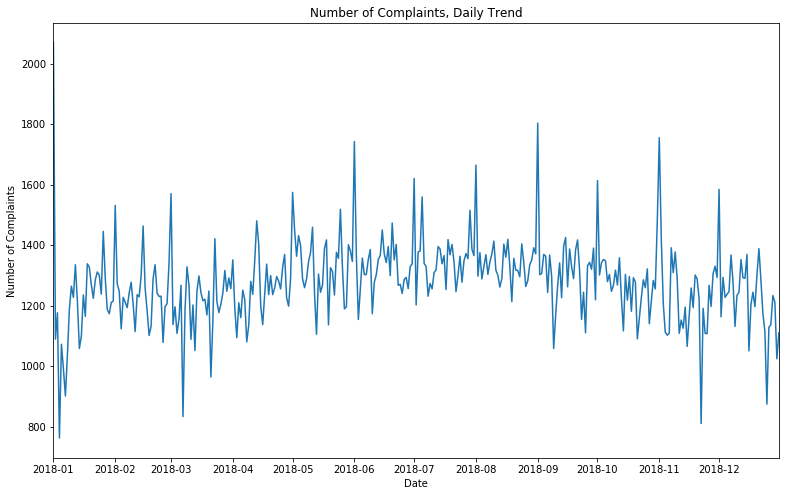

In [71]:
complaints_by_day.plot(figsize=(13,8))
plt.ylabel('Number of Complaints')
plt.xlabel('Date')
plt.title('Number of Complaints, Daily Trend');

In [72]:
pd.DataFrame(nypd['CMPLNT_FR_DATE'].value_counts().sort_values(ascending=False)).head(20)

,CMPLNT_FR_DATE
2018-01-01,2069
2018-09-01,1803
2018-11-01,1755
2018-06-01,1742
2018-08-01,1664
2018-07-01,1620
2018-10-01,1613
2018-12-01,1584
2018-05-01,1574
2018-03-01,1570


**Interesting that the days that have the most complaints are the first of the month! Why is that?**

**Let's get number of complaints by month**

In [73]:
complaints_by_month = nypd['CMPLNT_FR_MONTH'].value_counts().sort_index()
complaints_by_month

1     37696
2     34689
3     37507
4     37617
5     41297
6     40048
7     41990
8     41669
9     39423
10    39614
11    36752
12    37979
Name: CMPLNT_FR_MONTH, dtype: int64

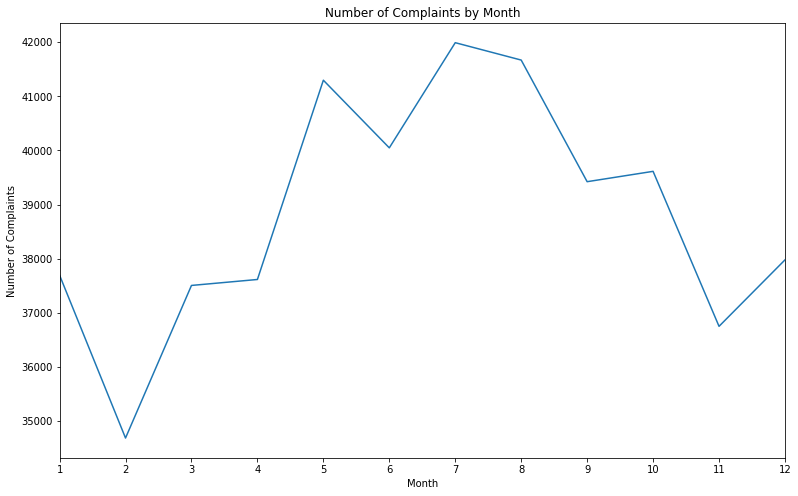

In [74]:
complaints_by_month.plot(figsize=(13,8), xticks=complaints_by_month.index)
plt.ylabel('Number of Complaints')
plt.xlabel('Month')
plt.title('Number of Complaints by Month');

In [75]:
nypd['CMPLNT_FR_MONTH'].value_counts().sort_values(ascending=False)

7     41990
8     41669
5     41297
6     40048
10    39614
9     39423
12    37979
1     37696
4     37617
3     37507
11    36752
2     34689
Name: CMPLNT_FR_MONTH, dtype: int64

## Conclusion #1:
## More criminal activity happens during the warmer months of the year, summertime. Months with the highest number of complaints are May, June, July, August

**Let's get number of complaints by hour**

In [76]:
complaints_by_hour = nypd['CMPLNT_FR_HOUR'].value_counts().sort_index()
complaints_by_hour

0     23164
1     14734
2     12331
3     10572
4      9164
5      6828
6      7469
7     10800
8     16855
9     18318
10    19246
11    19742
12    27460
13    22300
14    24930
15    27565
16    27498
17    27935
18    27674
19    25690
20    24957
21    21886
22    20667
23    18496
Name: CMPLNT_FR_HOUR, dtype: int64

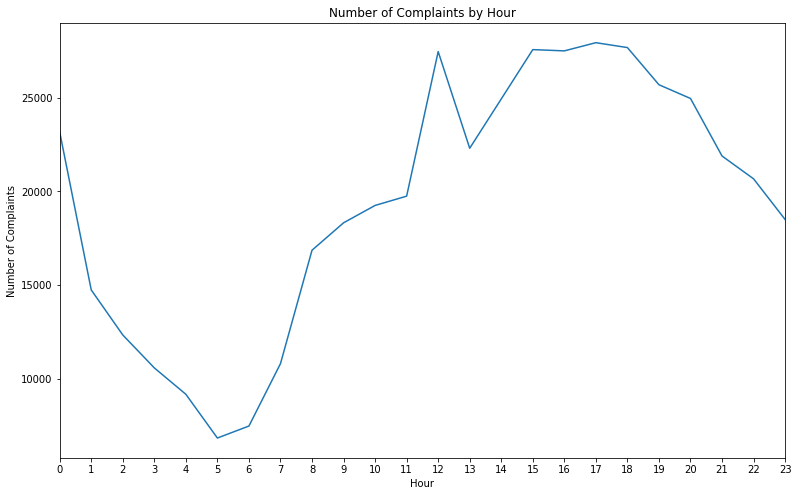

In [77]:
complaints_by_hour.plot(figsize=(13,8), xticks=complaints_by_hour.index)
plt.ylabel('Number of Complaints')
plt.xlabel('Hour')
plt.title('Number of Complaints by Hour');

In [78]:
nypd['CMPLNT_FR_HOUR'].value_counts().sort_values(ascending=False)

17    27935
18    27674
15    27565
16    27498
12    27460
19    25690
20    24957
14    24930
0     23164
13    22300
21    21886
22    20667
11    19742
10    19246
23    18496
9     18318
8     16855
1     14734
2     12331
7     10800
3     10572
4      9164
6      7469
5      6828
Name: CMPLNT_FR_HOUR, dtype: int64

## Conclusion #2:
## Top 5 times for complaints are 5pm, 6pm, 3pm, 4pm, and 12pm

**Let's dive deeper and see if we see any trends by day of week and hour of day**

In [79]:
nypd[['CMPLNT_NUM', 'CMPLNT_FR_DAY_OF_WEEK', 'CMPLNT_FR_HOUR']].head(10)

,CMPLNT_NUM,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR
0,774621657,0,12
1,232548146,4,11
2,452701517,4,16
3,620357753,1,16
4,110535568,1,14
5,340031034,3,23
6,640327678,2,16
7,258723058,4,17
8,601955785,6,8
9,444903438,1,14


In [80]:
cmplnts_dayofweek_hour = nypd.groupby(['CMPLNT_FR_DAY_OF_WEEK', 'CMPLNT_FR_HOUR']).CMPLNT_NUM.count()

**Doublechecking to make sure this adds up to the total number of complaints**

In [81]:
cmplnts_dayofweek_hour.sum()

466281

In [82]:
cmplnts_dayofweek_hour

CMPLNT_FR_DAY_OF_WEEK  CMPLNT_FR_HOUR
0                      0                 3531
                       1                 1889
                       2                 1537
                       3                 1261
                       4                 1161
                                         ... 
6                      19                3268
                       20                3226
                       21                2891
                       22                2869
                       23                2429
Name: CMPLNT_NUM, Length: 168, dtype: int64

In [83]:
cmplnts_dayofweek_hour = cmplnts_dayofweek_hour.unstack()

In [84]:
cmplnts_dayofweek_hour = cmplnts_dayofweek_hour.transpose()

In [85]:
cmplnts_dayofweek_hour

CMPLNT_FR_DAY_OF_WEEK,0,1,2,3,4,5,6
CMPLNT_FR_HOUR,,,,,,,
0,3531,2715,3031,3348,3118,3844,3577
1,1889,1613,1708,1889,1985,2788,2862
2,1537,1221,1384,1444,1645,2560,2540
3,1261,917,1112,1179,1277,2329,2497
4,1161,883,906,959,1091,1961,2203
5,950,726,789,811,861,1298,1393
6,1011,1022,1103,1065,1140,1046,1082
7,1626,1605,1776,1805,1605,1196,1187
8,2786,2580,2666,2692,2606,1823,1702


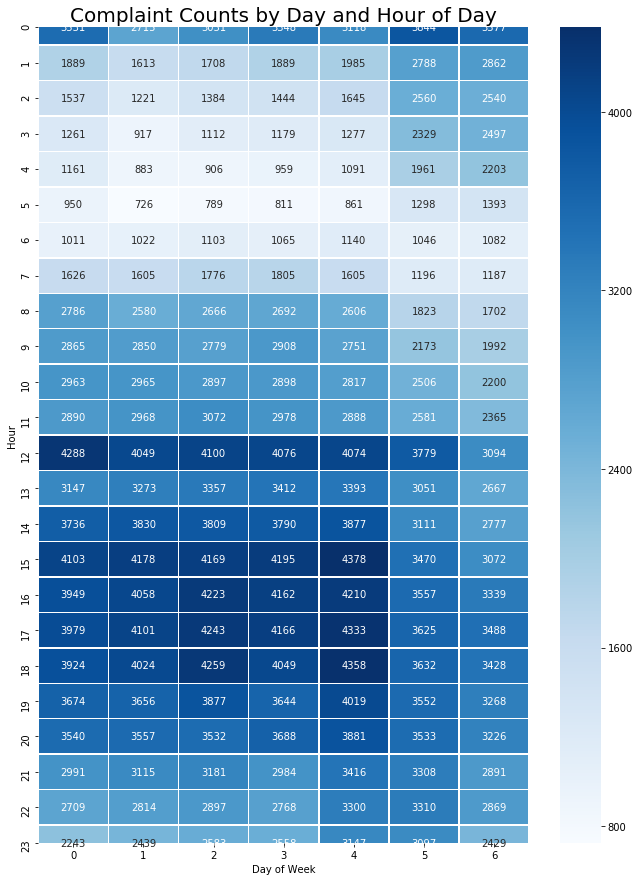

In [86]:
plt.figure(figsize=(11,15))
ax = sns.heatmap(cmplnts_dayofweek_hour, annot=True, fmt="d", linewidths=.5, cmap = 'Blues');
ax.axes.set_title("Complaint Counts by Day and Hour of Day", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour');
# plt.subplots.set_ylim(-0.5, -0.5)

## Conclusion #3:
## Noon, 3pm-7pm have the most criminal activity. Midnight on weekends also sees much activity

In [87]:
nypd[nypd['SUSP_AGE_GROUP'] == 'UNKNOWN']

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,45-64,WHITE,F,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-10-02 16:00:00,10,1,16,2018-10-02
5,340031034,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,18-24,BLACK,F,2018-06-07 23:30:00,6,3,23,2018-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466285,410465272,GRAND LARCENY,FELONY,QUEENS,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,UNKNOWN,UNKNOWN,U,65+,WHITE HISPANIC,F,2018-09-13 09:00:00,9,3,9,2018-09-13
466286,843436450,GRAND LARCENY,FELONY,BROOKLYN,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,UNKNOWN,UNKNOWN,U,18-24,WHITE HISPANIC,F,2018-12-25 05:00:00,12,1,5,2018-12-25
466287,800441646,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,UNKNOWN,UNKNOWN,U,<18,BLACK,F,2018-12-30 19:00:00,12,6,19,2018-12-30
466291,791474790,FRAUDS,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-11-06 00:00:00,11,1,0,2018-11-06


## Now, let's look at the complaints themselves

**First, top complaints overall and by borough**

**Let's filter out records where borough is UNKNOWN**

In [88]:
nypd_boro_known = nypd[nypd['BORO_NM'] != 'UNKNOWN']
nypd_boro_known

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,45-64,WHITE,F,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-10-02 16:00:00,10,1,16,2018-10-02
5,340031034,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,18-24,BLACK,F,2018-06-07 23:30:00,6,3,23,2018-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466290,341791124,PETIT LARCENY,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,<18,BLACK HISPANIC,M,25-44,BLACK HISPANIC,F,2018-12-11 20:00:00,12,1,20,2018-12-11
466291,791474790,FRAUDS,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-11-06 00:00:00,11,1,0,2018-11-06
466292,584053940,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,UNKNOWN,UNKNOWN,U,45-64,BLACK HISPANIC,F,2018-12-31 18:00:00,12,0,18,2018-12-31
466293,495559106,MISCELLANEOUS PENAL LAW,FELONY,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,25-44,BLACK,F,25-44,BLACK HISPANIC,F,2018-12-31 13:20:00,12,0,13,2018-12-31


In [89]:
nypd_all_boro = pd.DataFrame(nypd_boro_known.OFNS_DESC.value_counts(dropna=False).head(5))
nypd_all_boro

,OFNS_DESC
PETIT LARCENY,87063
HARRASSMENT 2,70627
ASSAULT 3 & RELATED OFFENSES,53322
CRIMINAL MISCHIEF & RELATED OF,47627
GRAND LARCENY,44212


In [90]:
nypd_brooklyn = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'BROOKLYN'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_brooklyn

,OFNS_DESC
PETIT LARCENY,24422
HARRASSMENT 2,20864
ASSAULT 3 & RELATED OFFENSES,15066
CRIMINAL MISCHIEF & RELATED OF,14612
GRAND LARCENY,11535


In [91]:
nypd_manhattan = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'MANHATTAN'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_manhattan

,OFNS_DESC
PETIT LARCENY,27754
GRAND LARCENY,16802
HARRASSMENT 2,14474
ASSAULT 3 & RELATED OFFENSES,10983
CRIMINAL MISCHIEF & RELATED OF,9641


In [92]:
nypd_bronx = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'BRONX'].\
                          OFNS_DESC.value_counts(dropna=False).head(5))
nypd_bronx

,OFNS_DESC
HARRASSMENT 2,16269
PETIT LARCENY,15446
ASSAULT 3 & RELATED OFFENSES,14385
CRIMINAL MISCHIEF & RELATED OF,10690
GRAND LARCENY,6449


In [93]:
nypd_queens = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'QUEENS'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_queens

,OFNS_DESC
PETIT LARCENY,16062
HARRASSMENT 2,14474
ASSAULT 3 & RELATED OFFENSES,10650
CRIMINAL MISCHIEF & RELATED OF,10146
GRAND LARCENY,8238


In [94]:
nypd_staten_island = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'STATEN ISLAND'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_staten_island

,OFNS_DESC
HARRASSMENT 2,4546
PETIT LARCENY,3379
CRIMINAL MISCHIEF & RELATED OF,2538
ASSAULT 3 & RELATED OFFENSES,2238
OFF. AGNST PUB ORD SENSBLTY &,1193


In [95]:
nypd_boro_known.BORO_NM.value_counts().sort_index()

BRONX            101314
BROOKLYN         137422
MANHATTAN        115188
QUEENS            91055
STATEN ISLAND     20990
Name: BORO_NM, dtype: int64

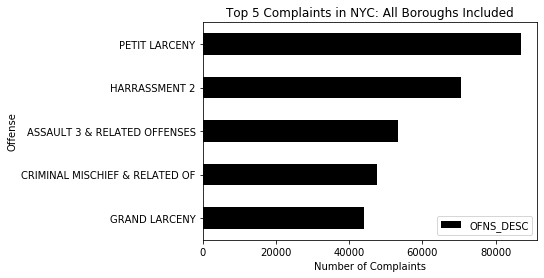

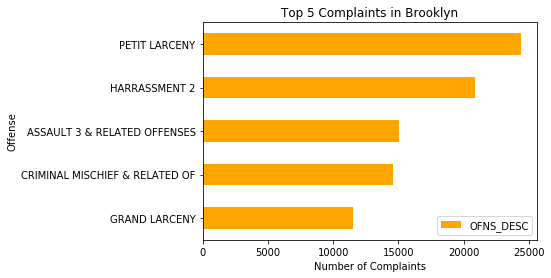

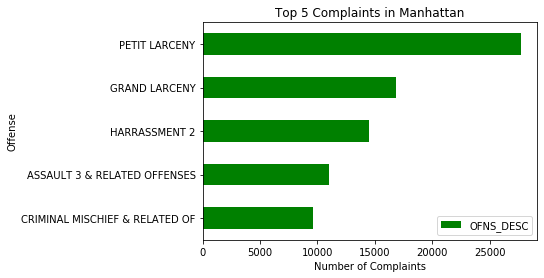

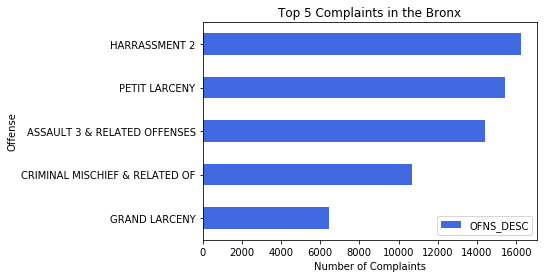

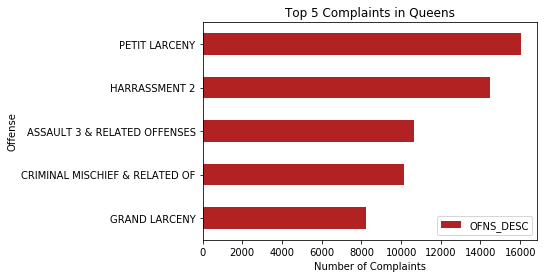

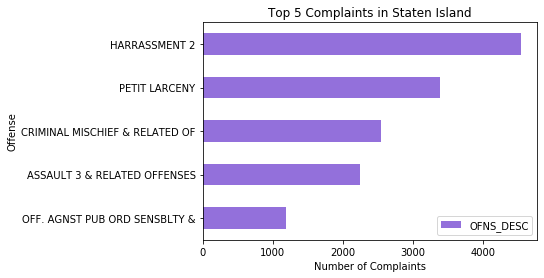

In [96]:
nypd_all_boro.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='black')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in NYC: All Boroughs Included');

nypd_brooklyn.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='orange')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Brooklyn');

nypd_manhattan.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='green')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Manhattan');

nypd_bronx.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='royalblue')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in the Bronx');

nypd_queens.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='firebrick')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Queens');

nypd_staten_island.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='mediumpurple')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Staten Island');

### Observation #4:
### Top 5 complaints of each borough is fairly similar across the boroughs, with some slight differences in ranking. Staten Island with an outlier: Offenses Against Public Order, Public Sensibilities and the Right to Privacy - ranking as the 5th most popular complaint.

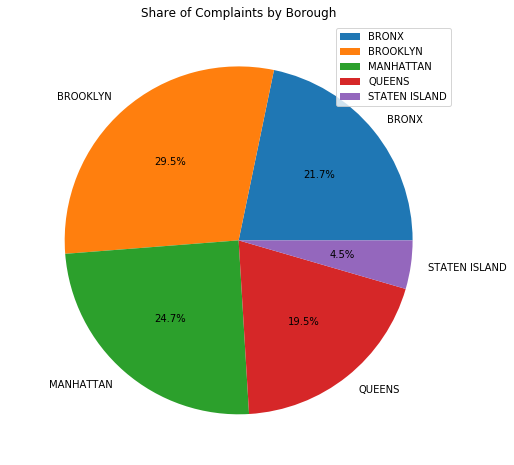

In [97]:
nypd_boro_known.groupby(['BORO_NM']).count().plot(kind='pie', y='CMPLNT_NUM', figsize=(8,8), autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Share of Complaints by Borough');

**Refer to Excel sheet to see how the top 5 complaints are similar/different amongst the boroughs. Hint: Pretty similar! Add in a conclusion/insight here**

**Creating a table of the boroughs with volume of complaints and population to calculate per capita complaint volume**

In [98]:
boro_cmplnt = pd.DataFrame(nypd_boro_known['BORO_NM'].value_counts().sort_index())
boro_cmplnt
boro_cmplnt.rename(columns = {'BORO_NM': 'VOL_CMPLNTS'}, inplace=True)

In [99]:
boro_cmplnt

,VOL_CMPLNTS
BRONX,101314
BROOKLYN,137422
MANHATTAN,115188
QUEENS,91055
STATEN ISLAND,20990


**Population from U.S. Census Bureau estimates for July 1, 2018 https://www1.nyc.gov/site/planning/planning-level/nyc-population/current-future-populations.page**

In [100]:
boro_cmplnt.at['BRONX', 'POPULATION'] = 1432132
boro_cmplnt.at['BROOKLYN', 'POPULATION'] = 2582830
boro_cmplnt.at['MANHATTAN', 'POPULATION'] = 1628701
boro_cmplnt.at['QUEENS', 'POPULATION'] = 2278906
boro_cmplnt.at['STATEN ISLAND', 'POPULATION'] = 476179
boro_cmplnt['POPULATION'] = boro_cmplnt['POPULATION'].astype(int)

In [101]:
boro_cmplnt

,VOL_CMPLNTS,POPULATION
BRONX,101314,1432132
BROOKLYN,137422,2582830
MANHATTAN,115188,1628701
QUEENS,91055,2278906
STATEN ISLAND,20990,476179


In [102]:
boro_cmplnt.dtypes

VOL_CMPLNTS    int64
POPULATION     int64
dtype: object

In [103]:
boro_cmplnt['CMPLNTS_PER_CAPITA'] = boro_cmplnt['VOL_CMPLNTS'] / boro_cmplnt['POPULATION']
boro_cmplnt = boro_cmplnt.sort_values(by='CMPLNTS_PER_CAPITA', ascending=False)

In [104]:
boro_cmplnt

,VOL_CMPLNTS,POPULATION,CMPLNTS_PER_CAPITA
BRONX,101314,1432132,0.070743
MANHATTAN,115188,1628701,0.070724
BROOKLYN,137422,2582830,0.053206
STATEN ISLAND,20990,476179,0.044080
QUEENS,91055,2278906,0.039956


In [105]:
boro_cmplnt.dtypes

VOL_CMPLNTS             int64
POPULATION              int64
CMPLNTS_PER_CAPITA    float64
dtype: object

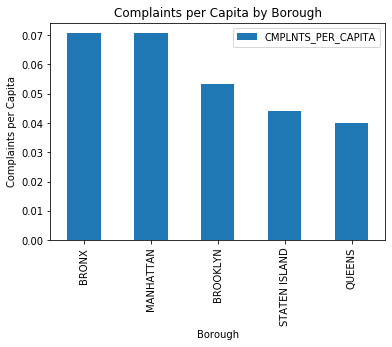

### Observation #5:
### Brooklyn takes top borough for share of complaints across NYC. However, when factoring for population, the Bronx has the most number of complaints per capita (by head), with Manhattan trailing not too far behind.

## Now let's look at the demographic breakdown of suspects

In [107]:
nypd.head()

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,45-64,WHITE,F,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-10-02 16:00:00,10,1,16,2018-10-02
4,110535568,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,UNKNOWN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-08-14 14:20:00,8,1,14,2018-08-14


In [108]:
nypd.SUSP_SEX.value_counts()

M    212011
U    188429
F     65841
Name: SUSP_SEX, dtype: int64

In [109]:
nypd.SUSP_RACE.value_counts()

UNKNOWN                           203148
BLACK                             131552
WHITE HISPANIC                     61987
WHITE                              35918
BLACK HISPANIC                     19374
ASIAN / PACIFIC ISLANDER           13132
AMERICAN INDIAN/ALASKAN NATIVE      1170
Name: SUSP_RACE, dtype: int64

In [110]:
nypd.SUSP_AGE_GROUP.value_counts()

UNKNOWN    246241
25-44      117270
45-64       44450
18-24       41938
<18         12436
65+          3946
Name: SUSP_AGE_GROUP, dtype: int64

**Let's create a copy of the dataframe to only include records where the suspect's sex, race and age group is known**

In [111]:
susp_demo_2 = nypd[(nypd['SUSP_SEX'] != 'U') & \
                 (nypd['SUSP_RACE'] != 'UNKNOWN') & \
                 (nypd['SUSP_AGE_GROUP'] != 'UNKNOWN')].copy()

In [112]:
susp_demo_2.shape

(208827, 17)

**This cuts the records down by more than half!**

In [113]:
susp_grouped_demo_2 = susp_demo_2.groupby(['SUSP_SEX', \
                                       'SUSP_RACE', \
                                       'SUSP_AGE_GROUP']). \
                                        CMPLNT_NUM.count()

In [114]:
susp_grouped_demo_2

SUSP_SEX  SUSP_RACE                       SUSP_AGE_GROUP
F         AMERICAN INDIAN/ALASKAN NATIVE  18-24                26
                                          25-44               111
                                          45-64                48
                                          65+                   6
                                          <18                   6
                                                            ...  
M         WHITE HISPANIC                  18-24              7610
                                          25-44             22182
                                          45-64              6781
                                          65+                 509
                                          <18                1896
Name: CMPLNT_NUM, Length: 60, dtype: int64

In [115]:
susp_grouped_demo_2.sum()

208827

In [116]:
susp_grouped_demo_2 = susp_grouped_demo_2.unstack()

In [117]:
def highlight_top_5(x):
    color = 'red' if x > 12000 else 'black'
    return 'color: %s' % color

In [118]:
susp_grouped_demo_styled_2 = susp_grouped_demo_2.style.applymap(highlight_top_5)
susp_grouped_demo_styled_2

## Alternate Analysis - Conclusion #4 :
## Studies have shown that "Crime occurs most frequently during the second and third decades of life. Males commit more crime overall and more violent crime than females." 2018 crime data from the NYPD shows the top suspect demos are:
### 1. Male, Black, 25-44
### 2. Male, White Hispanic, 25-44
### 3. Male, Black, 45-64
### 4. Male, Black, 18-24
### 5. Female, Black, 25-44

### I choose not to focus on race here

**Let's look at the suspect demo by gender and age only**

In [119]:
susp_demo = nypd[(nypd['SUSP_SEX'] != 'U') & \
                 (nypd['SUSP_AGE_GROUP'] != 'UNKNOWN')].copy()

In [120]:
susp_demo.shape

(216319, 17)

In [121]:
susp_grouped_demo = susp_demo.groupby(['SUSP_SEX', \
                                       'SUSP_AGE_GROUP']). \
                                        CMPLNT_NUM.count()

In [122]:
susp_grouped_demo.sum()

216319

In [123]:
susp_grouped_demo

SUSP_SEX  SUSP_AGE_GROUP
F         18-24             10206
          25-44             26468
          45-64              9822
          65+                1031
          <18                3626
M         18-24             31056
          25-44             88836
          45-64             33972
          65+                2846
          <18                8456
Name: CMPLNT_NUM, dtype: int64

In [124]:
susp_grouped_demo = susp_grouped_demo.unstack()

In [125]:
susp_grouped_demo

SUSP_AGE_GROUP,18-24,25-44,45-64,65+,<18
SUSP_SEX,,,,,
F,10206,26468,9822,1031,3626
M,31056,88836,33972,2846,8456


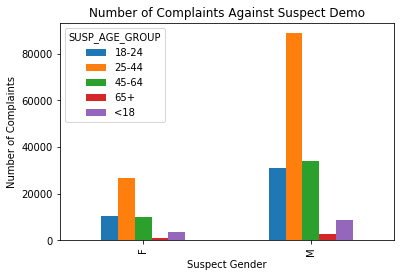

In [126]:
susp_grouped_demo.plot(kind='bar')
plt.ylabel('Number of Complaints')
plt.xlabel('Suspect Gender')
plt.title('Number of Complaints Against Suspect Demo');

## Conclusion #4 :
## Studies have shown that "Crime occurs most frequently during the second and third decades of life. Males commit more crime overall and more violent crime than females." 2018 crime data from NYPD shows the top suspect demos are:
### 1. Male, 25-44
### 2. Male, 45-64
### 3. Male, 18-24
### 4. Female, 25-44
### 5. Female, 18-24

## NYPD 2018 crime data is in-line with these studies.

In [127]:
nypd.head()

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
1,232548146,PETIT LARCENY,MISDEMEANOR,BROOKLYN,RESIDENCE-HOUSE,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,45-64,WHITE,F,2018-08-24 11:00:00,8,4,11,2018-08-24
2,452701517,DANGEROUS WEAPONS,FELONY,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E,2018-03-30 16:55:00,3,4,16,2018-03-30
3,620357753,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,N.Y. POLICE DEPT,UNKNOWN,UNKNOWN,U,65+,BLACK,M,2018-10-02 16:00:00,10,1,16,2018-10-02
4,110535568,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,UNKNOWN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-08-14 14:20:00,8,1,14,2018-08-14


In [128]:
nypd.SUSP_RACE.value_counts()

UNKNOWN                           203148
BLACK                             131552
WHITE HISPANIC                     61987
WHITE                              35918
BLACK HISPANIC                     19374
ASIAN / PACIFIC ISLANDER           13132
AMERICAN INDIAN/ALASKAN NATIVE      1170
Name: SUSP_RACE, dtype: int64

In [129]:
nypd.shape

(466281, 17)

**Let's create a copy of the dataframe to only include records where the victim's race and suspect's race is known**

In [130]:
t = nypd[(nypd['VIC_RACE'] != 'UNKNOWN') & \
         (nypd['SUSP_RACE'] != 'UNKNOWN')].copy()
t

,CMPLNT_NUM,OFNS_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY_OF_WEEK,CMPLNT_FR_HOUR,CMPLNT_FR_DATE
0,774621657,ROBBERY,FELONY,BRONX,BUS STOP,N.Y. POLICE DEPT,UNKNOWN,BLACK,M,<18,BLACK,M,2018-10-08 12:30:00,10,0,12,2018-10-08
4,110535568,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,UNKNOWN,NaN,N.Y. POLICE DEPT,25-44,BLACK,M,45-64,BLACK,M,2018-08-14 14:20:00,8,1,14,2018-08-14
6,640327678,HARRASSMENT 2,VIOLATION,QUEENS,OTHER,N.Y. POLICE DEPT,45-64,WHITE,U,45-64,BLACK,F,2018-06-20 16:40:00,6,2,16,2018-06-20
24,429196009,HARRASSMENT 2,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,45-64,BLACK,F,45-64,BLACK,M,2018-02-15 14:30:00,2,3,14,2018-02-15
27,690552757,HARRASSMENT 2,VIOLATION,BRONX,PUBLIC SCHOOL,N.Y. POLICE DEPT,45-64,WHITE,F,45-64,BLACK,M,2018-06-20 14:00:00,6,2,14,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466288,753006229,HARRASSMENT 2,VIOLATION,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,<18,BLACK,M,45-64,BLACK,M,2018-12-31 02:30:00,12,0,2,2018-12-31
466289,207025065,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,STATEN ISLAND,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,<18,BLACK,F,<18,BLACK,F,2018-12-20 13:44:00,12,3,13,2018-12-20
466290,341791124,PETIT LARCENY,MISDEMEANOR,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,<18,BLACK HISPANIC,M,25-44,BLACK HISPANIC,F,2018-12-11 20:00:00,12,1,20,2018-12-11
466293,495559106,MISCELLANEOUS PENAL LAW,FELONY,BRONX,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,25-44,BLACK,F,25-44,BLACK HISPANIC,F,2018-12-31 13:20:00,12,0,13,2018-12-31


In [131]:
u = t.groupby(['VIC_RACE', 'SUSP_RACE']).CMPLNT_NUM.count()
u

VIC_RACE                        SUSP_RACE                     
AMERICAN INDIAN/ALASKAN NATIVE  AMERICAN INDIAN/ALASKAN NATIVE      370
                                ASIAN / PACIFIC ISLANDER             64
                                BLACK                               511
                                BLACK HISPANIC                       54
                                WHITE                               149
                                WHITE HISPANIC                      134
ASIAN / PACIFIC ISLANDER        AMERICAN INDIAN/ALASKAN NATIVE      119
                                ASIAN / PACIFIC ISLANDER           6356
                                BLACK                              4974
                                BLACK HISPANIC                      539
                                WHITE                              1801
                                WHITE HISPANIC                     2123
BLACK                           AMERICAN INDIAN/ALASKAN NATIVE      113
 

In [132]:
u.sum()

177992

In [133]:
u = u.unstack()

In [134]:
u

SUSP_RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
VIC_RACE,,,,,,
AMERICAN INDIAN/ALASKAN NATIVE,370,64,511,54,149,134
ASIAN / PACIFIC ISLANDER,119,6356,4974,539,1801,2123
BLACK,113,856,58310,2462,2631,5765
BLACK HISPANIC,26,135,3454,3777,459,2802
WHITE,167,1242,9143,1329,15788,5118
WHITE HISPANIC,96,887,12026,4779,3199,26234


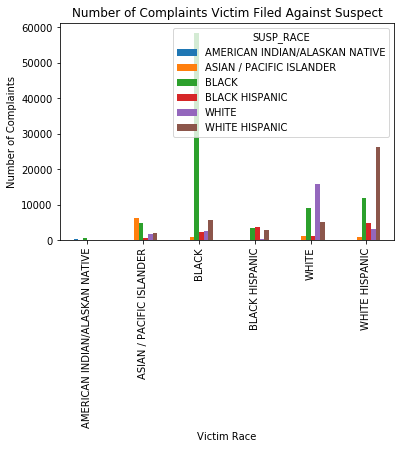

In [135]:
u.plot(kind='bar')
plt.ylabel('Number of Complaints')
plt.xlabel('Victim Race')
plt.title('Number of Complaints Victim Filed Against Suspect');

## Cleaning and Data Prep needed

* Set new index (TBD) -- **Not needed**
* Handle nulls in these fields
 * `OFNS_DESC` -- **Done. Dropped rows where `OFNS_DESC` is null**
 * `BORO_NM` -- **Done. Changed all nulls to UNKNOWN**
 * `PREM_TYPE_DESC` -- **Ignoring nulls. We won't use this for our analysis**
 * `SUSP_AGE_GROUP` -- **Done. Changed all nulls to U**
 * `SUSP_RACE` -- **Done. Changed all nulls to UNKNOWN**
 * `SUSP_SEX` -- **Done. Changed all nulls to UNKNOWN**
* Handle invalid data for `SUSP_AGE_GROUP` and `VIC_AGE_GROUP` -- **Done. Changed all invalid ages to U**
* Convert these fields to Timestamp
 * `CMPLNT_FR_DT` -- **Not needed since I combined CMPLNT_FR_DT and CMPLNT_FR__TM into one field CMPLNT_FR, which I then converted into Timestamp**
 * `CMPLNT_FR_TM` -- **Not needed since I combined CMPLNT_FR_DT and CMPLNT_FR__TM into one field CMPLNT_FR, which I then converted into Timestamp**
* Remove duplicate rows -- **First pass completed. Dirty data may still exist, however**



Optional
* Combine `CMPLNT_FR_DT` and `CMPLNT_FR_TM` into one field -- **Done. Created new field CMPLNT_FR**
* Create month, week, day of week columns for `CMPLNT_FR_DT` -- **Done**
* Create hour column for `CMPLNT_FR_TM` -- **Done**


## Framing the problem

* Start *framing* the problem -- This is Step 1 of the Data Science Workflow

 * Make a list of **what you know**
 * Make a list of **what you don't know**
 * Make a list of possible problem statements
   * Try to come up with *5-10* of them if possible
   * You will decide on which ones to explore later, but for now brainstorm as much as you can.
   

#### What I know
* All complaints are from 2018
* Complaints are timestamped and we have the level of detail down to month, day, year, hour, minute
* `OFNS_DESC` is an important field that tells us what each complaint was
* Each offense occurs within a borough of NYC, defined as `BORO_NM`
* Complaints are categorized under `LAW_CAT_CD` as either a felony, misdemeanor, or violation
* Different jurisdictions are responsible for handling each complaint. The police department is not responsible for all complaints
* Victim and suspect demo (age, sex, race) may be available for each offense



#### What I don't know
* The most popular or highest volume of offenses overall in 2018
* Seasonal trends, if any, in offenses
* Other time-based trends in offenses, down to month, day of the week, and hour of the day
* If some boroughs in New York City have more complaints than other boroughs
* If certain types of offenses are more prevalent in some boroughs versus others
* Which offenses are deemed a felony vs. misdemeanor vs. violation
* What complaints is each jurisdiction primarily responsible for handling
* If there’s a relationship between victim demo and suspect demo


#### Possible problem statements
1. More crimes occur during the warmer months of the year
- Criminal activity is more common during times of the day when there are more people around or active, i.e. commute times, meal times. Criminal activity is also more likely to occur when suspects believe they won’t be seen or caught, i.e. late night
- Racial bias may exist, with victims having a tendency to file complaints against specific races
- Criminal activity in NYC aligns with known correlations of [criminal behavior](https://en.wikipedia.org/wiki/Statistical_correlations_of_criminal_behaviour#Gender_and_biology) **
- Each borough of NYC has roughly the same volume of complaints as other boroughs, when comparing per capita

** Crime occurs most frequently during the second and third decades of life. Males commit more crime overall and more violent crime than females. They commit more property crime except shoplifting, which is about equally distributed between the genders.
